In [1]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
import io
import zipfile

In [2]:
# URL della pagina principale
main_url = "https://dati.regione.sicilia.it/dataset/73146754-9877-4a4c-8ae7-b5b7385be81f"

# Scarichiamo il contenuto della pagina
response = requests.get(main_url)
if response.status_code != 200:
    print(f"Errore nel caricamento della pagina: {response.status_code}")
else:
    print("Pagina scaricata con successo!")

Pagina scaricata con successo!


In [3]:
# Controllo il tipo di dati ottenuti
print(response.headers.get("Content-Type"))
print(response.text[:500]) 

text/html; charset=utf-8

<!DOCTYPE html>
<!--[if IE 7]> <html lang="it" class="ie ie7"> <![endif]-->
<!--[if IE 8]> <html lang="it" class="ie ie8"> <![endif]-->
<!--[if IE 9]> <html lang="it" class="ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="it"> <!--<![endif]-->
  <head>
    <!--[if lte ie 8]><script type="text/javascript" src="/fanstatic/vendor/:version:2019-10-14T13:58:19/html5.min.js"></script><![endif]-->
<link rel="stylesheet" type="text/css" href="/fanstatic/vendor/:version:2019-10-14T13:58:19/select2


In [4]:
# Dato che è html usiamo BeautifulSoup per trovare i link nella pagina
soup = BeautifulSoup(response.text, "html.parser")
links = soup.find_all("a", href=True)

In [5]:
# Filtriamo solo quelli che ci interessano, ovvero quelli che contengono i dati delle precipitazioni per il 2020 in CSV
zip_links = [link["href"] for link in links if "sias-precipitazioni_csv_2020" in link["href"] and link["href"].endswith(".zip")]

# Stampiamo i link trovati
print(f"Trovati {len(zip_links)} file ZIP:")
for link in zip_links:
    print(link)

Trovati 12 file ZIP:
https://dati.regione.sicilia.it/download/dataset/sias-precipitazioni/filesystem/sias-precipitazioni_csv_2020_01.zip
https://dati.regione.sicilia.it/download/dataset/sias-precipitazioni/filesystem/sias-precipitazioni_csv_2020_02.zip
https://dati.regione.sicilia.it/download/dataset/sias-precipitazioni/filesystem/sias-precipitazioni_csv_2020_03.zip
https://dati.regione.sicilia.it/download/dataset/sias-precipitazioni/filesystem/sias-precipitazioni_csv_2020_04.zip
https://dati.regione.sicilia.it/download/dataset/sias-precipitazioni/filesystem/sias-precipitazioni_csv_2020_05.zip
https://dati.regione.sicilia.it/download/dataset/sias-precipitazioni/filesystem/sias-precipitazioni_csv_2020_06.zip
https://dati.regione.sicilia.it/download/dataset/sias-precipitazioni/filesystem/sias-precipitazioni_csv_2020_07.zip
https://dati.regione.sicilia.it/download/dataset/sias-precipitazioni/filesystem/sias-precipitazioni_csv_2020_08.zip
https://dati.regione.sicilia.it/download/dataset/si

In [6]:
#Ora scarichiamo e salviamo i file ZIP.
download_folder = "zip_files"
os.makedirs(download_folder, exist_ok=True)

for zip_url in zip_links:
    zip_name = zip_url.split("/")[-1]  # Estrai il nome del file
    zip_path = os.path.join(download_folder, zip_name)
    zip_response = requests.get(zip_url)
    
    if zip_response.status_code == 200:
        with open(zip_path, "wb") as f:
            f.write(zip_response.content)
        print(f"{zip_name} scaricato con successo!")
    else:
        print(f"Errore nel download di {zip_name}: {zip_response.status_code}")

sias-precipitazioni_csv_2020_01.zip scaricato con successo!
sias-precipitazioni_csv_2020_02.zip scaricato con successo!
sias-precipitazioni_csv_2020_03.zip scaricato con successo!
sias-precipitazioni_csv_2020_04.zip scaricato con successo!
sias-precipitazioni_csv_2020_05.zip scaricato con successo!
sias-precipitazioni_csv_2020_06.zip scaricato con successo!
sias-precipitazioni_csv_2020_07.zip scaricato con successo!
sias-precipitazioni_csv_2020_08.zip scaricato con successo!
sias-precipitazioni_csv_2020_09.zip scaricato con successo!
sias-precipitazioni_csv_2020_10.zip scaricato con successo!
sias-precipitazioni_csv_2020_11.zip scaricato con successo!
sias-precipitazioni_csv_2020_12.zip scaricato con successo!


In [7]:
# Estraiamo il contenuto di ogni ZIP

extracted_folder = "extracted_csv"
os.makedirs(extracted_folder, exist_ok=True)

for zip_name in os.listdir(download_folder):
    zip_path = os.path.join(download_folder, zip_name)

    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extracted_folder)
        print(f"Estrazione completata per: {zip_name}")

Estrazione completata per: sias-precipitazioni_csv_2020_01.zip
Estrazione completata per: sias-precipitazioni_csv_2020_02.zip
Estrazione completata per: sias-precipitazioni_csv_2020_03.zip
Estrazione completata per: sias-precipitazioni_csv_2020_04.zip
Estrazione completata per: sias-precipitazioni_csv_2020_05.zip
Estrazione completata per: sias-precipitazioni_csv_2020_06.zip
Estrazione completata per: sias-precipitazioni_csv_2020_07.zip
Estrazione completata per: sias-precipitazioni_csv_2020_08.zip
Estrazione completata per: sias-precipitazioni_csv_2020_09.zip
Estrazione completata per: sias-precipitazioni_csv_2020_10.zip
Estrazione completata per: sias-precipitazioni_csv_2020_11.zip
Estrazione completata per: sias-precipitazioni_csv_2020_12.zip


**Prima di procedere con la creazione di un unico DataFrame ci assicuriamo che non si creino conflitti con l'eventuale concatenazione, controllando la struttura di un singolo csv**

In [8]:
# Troviamo il primo file CSV nella cartella estratta
csv_files = [f for f in os.listdir(extracted_folder) if f.endswith(".csv")]
print("File CSV trovati:", len(csv_files))

if csv_files:
    sample_csv = csv_files[0]  # Prendiamo il primo file
    csv_path = os.path.join(extracted_folder, sample_csv)

# Carichiamo il CSV in un DataFrame
df_sample = pd.read_csv(csv_path, sep=";")
df_sample

File CSV trovati: 12


,ID_STAZ,ID_PAR,DATARIL,VALORE
0,706,65,2020-01-01 00:00:00.0,0.0
1,706,65,2020-01-01 01:00:00.0,0.0
2,706,65,2020-01-01 02:00:00.0,0.0
3,706,65,2020-01-01 03:00:00.0,0.0
4,706,65,2020-01-01 04:00:00.0,0.0
...,...,...,...,...
71337,1444,65,2020-01-28 11:00:00.0,0.0
71338,1444,65,2020-01-28 12:00:00.0,0.0
71339,1444,65,2020-01-28 13:00:00.0,0.0
71340,1444,65,2020-01-28 14:00:00.0,0.0


In [9]:
df_sample.info()  # Per vedere le colonne e i tipi di dati
df_sample.describe()  # Per statistiche sui dati numerici

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71342 entries, 0 to 71341
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID_STAZ  71342 non-null  int64  
 1   ID_PAR   71342 non-null  int64  
 2   DATARIL  71342 non-null  object 
 3   VALORE   71342 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.2+ MB


,ID_STAZ,ID_PAR,VALORE
count,71342.000000,71342.0,71342.000000
mean,801.647248,65.0,0.011051
std,203.551921,0.0,0.165999
min,683.000000,65.0,0.000000
25%,711.000000,65.0,0.000000
50%,739.000000,65.0,0.000000
75%,764.000000,65.0,0.000000
max,1444.000000,65.0,11.600000


Ho notato che alcune colonne risultano di tipo object invece di float o integer, dunque cambio il tipo quando faccio il DataFrame completo per facilitare le analisi.

In [10]:
# Carichiamo e concateniamo tutti i CSV
df_list = [pd.read_csv(os.path.join(extracted_folder, f), sep=';') for f in csv_files]
df_dati = pd.concat(df_list, ignore_index=True)

# Mostra le prime righe del DataFrame concatenato
df_dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453668 entries, 0 to 453667
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID_STAZ  453668 non-null  int64  
 1   ID_PAR   453668 non-null  int64  
 2   DATARIL  453668 non-null  object 
 3   VALORE   453668 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 13.8+ MB


In [11]:
df_dati["DATARIL"] = pd.to_datetime(df_dati['DATARIL'], format='%Y-%m-%d %H:%M:%S.%f')
df_dati["DATARIL"] = df_dati["DATARIL"].dt.floor('s')  # togliamo i millisecondi
df_dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453668 entries, 0 to 453667
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   ID_STAZ  453668 non-null  int64         
 1   ID_PAR   453668 non-null  int64         
 2   DATARIL  453668 non-null  datetime64[ns]
 3   VALORE   453668 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 13.8 MB


In [12]:
# Aggiungiamo il link che fornisce alcuni dati aggiuntivi sul dataset, seguendo i passi fatti precedentemente
url_sensori = ("https://dati.regione.sicilia.it/download/dataset/elenco-sensori-meteo/filesystem/elenco-sensori-meteo_csv_rsd.zip")
response = requests.get(url_sensori)

if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content), "r") as zip_ref:
        # Trova il primo file CSV nello ZIP (se ce ne sono più di uno, specifica il nome esatto)
        csv_name = [f for f in zip_ref.namelist() if f.endswith('.csv')][0]
        
        # Carica direttamente il CSV in un DataFrame senza estrarlo su disco
        with zip_ref.open(csv_name) as file:
            df_sensori = pd.read_csv(file, sep=";")
    
    print("Dataset caricato con successo!")
else:
    print(f"Errore nel download del file: {response.status_code}")
    df_sensori = None  # Imposta il DataFrame a None in caso di errore

# Controlla il DataFrame
if df_sensori is not None:
    df_sensori.info()
    df_sensori.describe()

Dataset caricato con successo!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_STAZ                     96 non-null     int64  
 1   DESC_STAZ                   96 non-null     object 
 2   ALTIT                       96 non-null     int64  
 3   X_LON                       96 non-null     float64
 4   Y_LAT                       96 non-null     float64
 5   COMUNE_CODISTAT             96 non-null     int64  
 6   COMUNE_NOME                 96 non-null     object 
 7   PROVINCIA_IDPROVINCIAISTAT  96 non-null     int64  
 8   PROVINCIA_SIGLAPROVINCIA    96 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 6.9+ KB


In [13]:
# Unisco i due DataFrame per le analisi
# Dunque effettuo un LEFT JOIN per mantenere tutte le righe del primo DataFrame 
# aggiungendo soltanto il dato sulle province e usando come chiave ID_STAZ
df = df_dati.merge(df_sensori[['ID_STAZ', 'PROVINCIA_SIGLAPROVINCIA']], on='ID_STAZ', how='left')

# Verifica il risultato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453668 entries, 0 to 453667
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ID_STAZ                   453668 non-null  int64         
 1   ID_PAR                    453668 non-null  int64         
 2   DATARIL                   453668 non-null  datetime64[ns]
 3   VALORE                    453668 non-null  float64       
 4   PROVINCIA_SIGLAPROVINCIA  453668 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 17.3+ MB


**#1 Analisi: visualizzo l'andamento nel tempo**

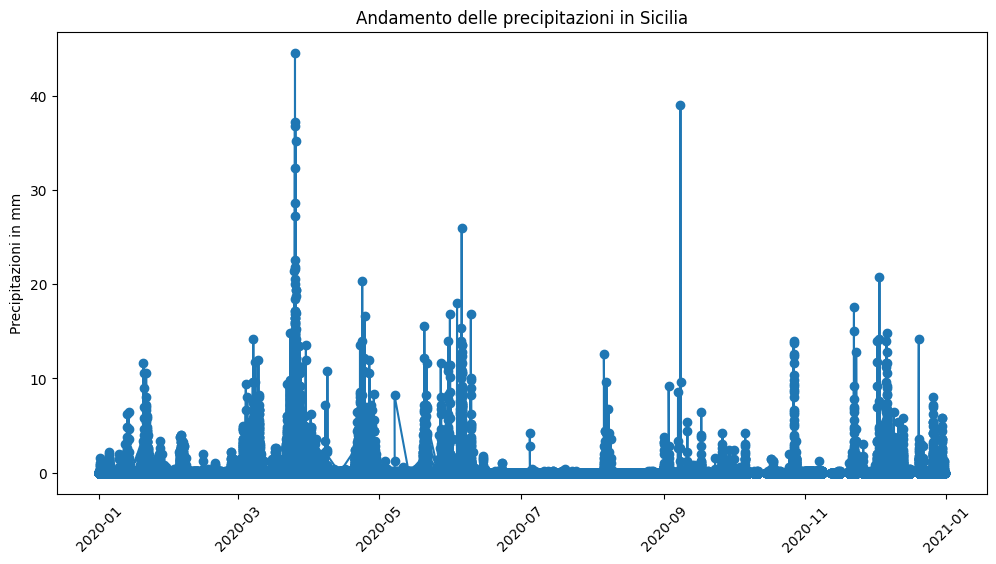

In [14]:
# Creazione del grafico
plt.figure(figsize=(12, 6))
plt.plot(df['DATARIL'], df['VALORE'], marker='o', linestyle='-')

plt.ylabel('Precipitazioni in mm')
plt.title('Andamento delle precipitazioni in Sicilia')
plt.xticks(rotation=45)  # Ruota le etichette dell'asse x per leggibilità

plt.show()

Incuriosita dal grafico approfondisco le medie mensili

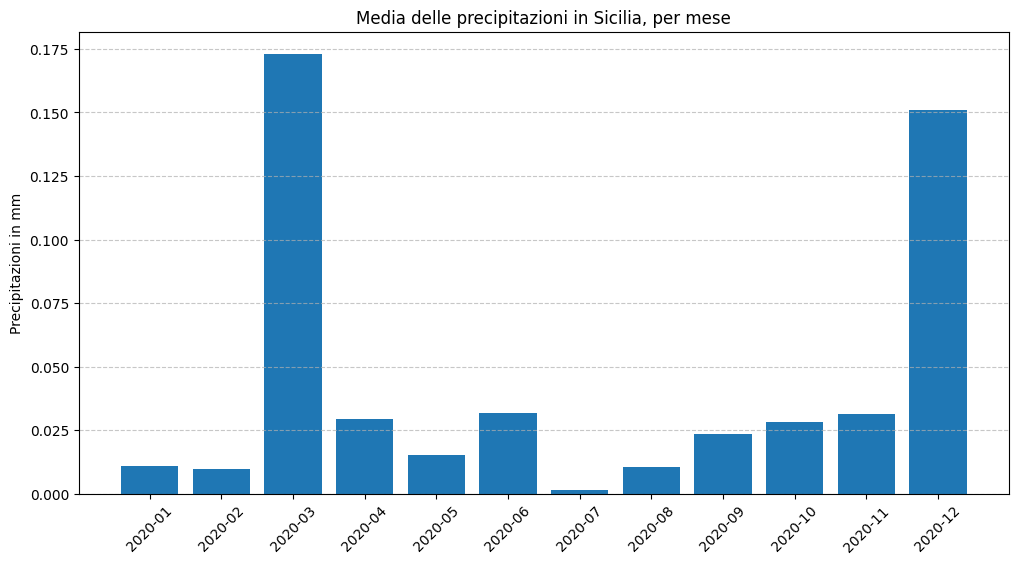

In [15]:
# Aggiungo una colonna mensile 
df['MESE'] = df['DATARIL'].dt.to_period('M')  # Formato 'YYYY-MM'
# Calcola la media della colonna VALORE per mese
media_per_mese = df.groupby('MESE')['VALORE'].mean().reset_index()
media_per_mese['MESE'] = media_per_mese['MESE'].astype(str)

plt.figure(figsize=(12, 6))
plt.bar(media_per_mese['MESE'], media_per_mese['VALORE'])

plt.ylabel('Precipitazioni in mm')
plt.title('Media delle precipitazioni in Sicilia, per mese')
plt.xticks(rotation=45)  # Ruota le etichette dell'asse x per leggibilità
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Possiamo osservare come il mese con più precipitazioni è stato marzo, seguito da dicembre. Invece il mese con meno precipitazioni è stato luglio.

**#2 Analisi: trovo le province con la media di precipitazioni più alta**

In [16]:
# Ordinare il DataFrame in base al rating in ordine decrescente
media_per_provincia = df.groupby('PROVINCIA_SIGLAPROVINCIA')['VALORE'].mean().reset_index()
top_provincia = media_per_provincia.sort_values(by="VALORE", ascending=False).head(5)

# Stampare i nomi dei migliori 3 whisky
print("Le 5 province con più precipitazioni sono:")
for idx, (i, row) in enumerate(top_provincia.iterrows(), start=1):
    print(f"{idx}. {row['PROVINCIA_SIGLAPROVINCIA']} - Precipitazioni annuali medie: {row['VALORE']:.3f}")


Le 5 province con più precipitazioni sono:
1. ME - Precipitazioni annuali medie: 0.057
2. CT - Precipitazioni annuali medie: 0.052
3. TP - Precipitazioni annuali medie: 0.050
4. SR - Precipitazioni annuali medie: 0.049
5. PA - Precipitazioni annuali medie: 0.043


**#3 Analisi: visualizzo l'andamento nel tempo per provincia, raggruppando i punti per mesi per una visualizzazione ottimale**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453668 entries, 0 to 453667
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ID_STAZ                   453668 non-null  int64         
 1   ID_PAR                    453668 non-null  int64         
 2   DATARIL                   453668 non-null  datetime64[ns]
 3   VALORE                    453668 non-null  float64       
 4   PROVINCIA_SIGLAPROVINCIA  453668 non-null  object        
 5   MESE                      453668 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), period[M](1)
memory usage: 20.8+ MB


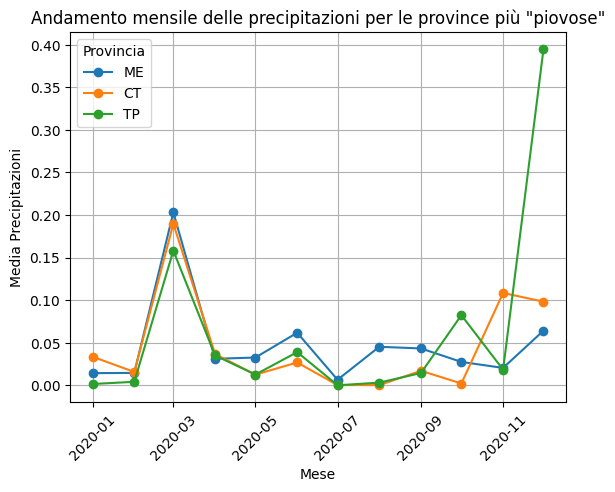

In [18]:
# Filtro solo le province di interesse
province_selezionate = ['ME', 'CT', 'TP']
df_filtrato = df[df['PROVINCIA_SIGLAPROVINCIA'].isin(province_selezionate)]

# Ordino i dati temporalmente
df_filtrato = df_filtrato.groupby(['MESE', 'PROVINCIA_SIGLAPROVINCIA'])['VALORE'].mean().reset_index()
df_filtrato['MESE'] = df_filtrato['MESE'].dt.to_timestamp()

# Plotta le linee per ogni provincia
for provincia, colore in zip(['ME', 'CT', 'TP'], ['blue', 'green', 'red']):
    df_provincia = df_filtrato[df_filtrato['PROVINCIA_SIGLAPROVINCIA'] == provincia]
    plt.plot(df_provincia['MESE'], df_provincia['VALORE'], label=provincia, marker='o', linestyle='-')

plt.xlabel('Mese')
plt.ylabel('Media Precipitazioni')
plt.title('Andamento mensile delle precipitazioni per le province più "piovose"')
plt.legend(title='Provincia')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()